In [1]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from random import randint

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

import treeinterpreter as ti

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

##import model
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import metrics



# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features_proc.csv')
test_features = pd.read_csv('data/testing_features_proc.csv')
train_labels = pd.read_csv('data/training_labels_proc.csv', names= ['score'])
test_labels = pd.read_csv('data/testing_labels_proc.csv' , names= ['score'])

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (69496, 43)
Testing Feature Size:   (29784, 43)
Training Labels Size:   (69496, 1)
Testing Labels Size:    (29784, 1)


In [3]:
train_features.head()

,CurrentLoanAmount,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,LoanStatus_Charged Off,LoanStatus_Fully Paid,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Credit Score
0,132506,991857.0,15456.31,16.0,11,0,79724,183172.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,728.0
1,668580,1847712.0,20632.86,23.4,10,0,424574,1022054.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,744.0
2,99999999,782838.0,8024.08,26.0,5,1,79496,286770.0,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,729.0
3,219648,736402.0,11843.84,11.8,8,0,56639,388080.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,723.0
4,99999999,1037172.0,24805.45,12.6,9,1,137180,216128.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,640.0


In [4]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [5]:
train_X , valid_X = split_vals(train_features.drop(columns="Credit Score"), 40000)
train_y , valid_y = split_vals(train_labels, 40000)
valid_y = valid_y['score']
train_y = train_y['score']

## Define loss func and print methods

In [6]:
def mse(x,y): return np.abs(y-x).mean()
def print_score(m):
    res = [mse(m.predict(train_X), train_y), mse(m.predict(valid_X), valid_y),
                m.score(train_X, train_y), m.score(valid_X, valid_y)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [7]:
## Default model
m = RandomForestRegressor(max_features='auto', criterion='friedman_mse', max_depth=15,max_leaf_nodes=None, 
                          min_samples_split=4, min_samples_leaf=4, n_estimators=500,n_jobs=-1, 
                          min_weight_fraction_leaf=0.0, oob_score=True)

%time m.fit(train_X, train_y)


Wall time: 1min 52s


RandomForestRegressor(bootstrap=True, criterion='friedman_mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [8]:
y = m.predict(valid_X)

In [9]:
res = mse(y, valid_y)

In [10]:
print_score(m)

[10.290510781697929, 13.61050277537989, 0.6568634221555195, 0.3753620375828869, 0.3804305621219163]


In [21]:
valid_X.shape

(29496, 42)

In [11]:
y = []
for i in m.estimators_:
    y.append(i.predict(valid_X)) 

In [17]:
y[4].shape

(29496,)

In [17]:
test_row = valid_X.values[None,3]

In [18]:
test_row

array([[4.382620e+05, 8.454240e+05, 1.557012e+04, 2.910000e+01,
        1.900000e+01, 0.000000e+00, 5.193840e+05, 1.310210e+06,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [16]:
prediction, bias, contributions = ti.predict(m, test_row)

NameError: name 'ti' is not defined

In [132]:
contributs = pd.DataFrame({'name': valid_X.columns, 'values': contributions[0]})
contributs.sort_values(by = 'values')

,name,values
6,Current Credit Balance,-1.339381
0,CurrentLoanAmount,-0.722679
4,Number of Open Accounts,-0.389304
10,LoanStatus_Fully Paid,-0.067651
9,LoanStatus_Charged Off,-0.025931
18,Years in current job_5 years,-0.008350
39,Purpose_small_business,0.000000
38,Purpose_renewable_energy,0.000000
36,Purpose_moving,0.000000
35,Purpose_major_purchase,0.000000


In [133]:
feat_imp = m.feature_importances_

In [134]:
fi = pd.DataFrame({'name': valid_X.columns, 'values': feat_imp})
fi.sort_values(by = 'values', ascending=False)

,name,values
12,Term_Short Term,0.266454
1,Annual Income,0.145204
7,Maximum Open Credit,0.123518
0,CurrentLoanAmount,0.097890
6,Current Credit Balance,0.092723
2,Monthly Debt,0.066546
3,Years of Credit History,0.065166
4,Number of Open Accounts,0.048967
30,Purpose_Debt Consolidation,0.016382
37,Purpose_other,0.010847


In [137]:
gm = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [138]:
gm.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [139]:
print_score(gm)

[1.3091915602218112, 13.078463627353605, 0.9828246852648103, 0.3765659083833768]


In [7]:
criterion = ['mse', 'mae']
# Number of trees used in the boosting process
n_estimators = [100,200,300, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15, 20]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8, 10]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10, 15]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]


# Define the grid of hyperparameters to search
hyperparameter_gridr = {'criterion' : criterion,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [8]:
# Create the model to use for hyperparameter tuning
model_r = RandomForestRegressor(random_state = 42, oob_score = True,
                        verbose = True)


In [9]:
# Set up the random search with 4-fold cross validation
random_cv_r = RandomizedSearchCV(estimator=model_r,
                               param_distributions=hyperparameter_gridr,
                               n_iter=20, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [10]:
# Fit on the training data
random_cv_r.fit(train_X, train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 1541.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 2435.4min finished
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  4.9min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=42, verbose=True, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'criterion': ['mse', 'mae'], 'n_estimators': [100, 200, 300, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 10, 15], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [11]:
# Get all of the cv results and sort by the test performance
random_results_r = pd.DataFrame(random_cv_r.cv_results_).sort_values('mean_test_score', ascending = False)

random_results_r.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
19,301.733067,22.447059,2.977705,0.224358,900,10,1,auto,15,mse,"{'n_estimators': 900, 'min_samples_split': 10,...",-13.940330,-13.978580,-13.904096,-13.941002,0.030411,1,-10.206568,-10.169936,-10.171357,-10.182620,0.016944
9,88208.645309,2183.358152,2.700780,0.102142,1500,10,6,None,10,mae,"{'n_estimators': 1500, 'min_samples_split': 10...",-14.619908,-14.197517,-14.755011,-14.524148,0.237453,2,-13.493277,-12.818500,-13.653963,-13.321913,0.361961
7,25.858209,0.146193,1.307838,0.014252,300,6,1,sqrt,20,mse,"{'n_estimators': 300, 'min_samples_split': 6, ...",-14.826794,-14.955672,-14.723468,-14.835311,0.094987,3,-10.357733,-10.256389,-10.416794,-10.343638,0.066239
18,79.731194,1.151480,3.714404,0.153478,1100,2,8,sqrt,20,mse,"{'n_estimators': 1100, 'min_samples_split': 2,...",-15.162814,-15.322453,-15.055104,-15.180123,0.109828,4,-13.555829,-13.463419,-13.548511,-13.522586,0.041944
13,125.187013,0.567198,0.854050,0.016734,900,6,6,None,5,mse,"{'n_estimators': 900, 'min_samples_split': 6, ...",-15.748430,-15.656650,-15.494924,-15.633338,0.104799,5,-15.595329,-15.350782,-15.447969,-15.464693,0.100534
10,152.764292,0.344896,1.024927,0.003292,1100,2,1,auto,5,mse,"{'n_estimators': 1100, 'min_samples_split': 2,...",-15.765102,-15.675090,-15.503832,-15.648011,0.108369,6,-15.608947,-15.366683,-15.455215,-15.476948,0.100090
12,9575.171041,282.613055,0.778918,0.020260,1100,6,1,sqrt,5,mae,"{'n_estimators': 1100, 'min_samples_split': 6,...",-16.327136,-16.331599,-16.198585,-16.285775,0.061678,7,-16.294623,-16.135624,-16.212500,-16.214249,0.064923
0,6748.816818,352.942527,0.617016,0.025884,900,10,6,log2,5,mae,"{'n_estimators': 900, 'min_samples_split': 10,...",-16.520677,-16.488071,-16.422508,-16.477086,0.040823,8,-16.493233,-16.321345,-16.444195,-16.419591,0.072298
3,31572.323687,509.563682,0.419546,0.012197,900,4,8,auto,2,mae,"{'n_estimators': 900, 'min_samples_split': 4, ...",-16.514758,-16.546131,-16.482056,-16.514315,0.026160,9,-16.483724,-16.485057,-16.514411,-16.494397,0.014162
4,7204.549039,228.540497,0.129321,0.023830,200,15,2,None,2,mae,"{'n_estimators': 200, 'min_samples_split': 15,...",-16.533826,-16.578081,-16.496676,-16.536194,0.033275,10,-16.501757,-16.516684,-16.527807,-16.515416,0.010673


In [12]:
random_cv_r.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
           oob_score=True, random_state=42, verbose=True, warm_start=False)

In [16]:
train_y.mean()

716.2470493372732

In [7]:
final_model_r = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
           oob_score=True, random_state=42, verbose=True, warm_start=False)

In [8]:
final_model_r.fit(train_X, train_y)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  5.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
           oob_score=True, random_state=42, verbose=True, warm_start=False)

In [9]:
y_pred = final_model_r.predict(valid_X)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.7s finished


In [10]:
def accuracy(y_labels, y_preds):
    ### Input:
    ## y_labels the labels of the validation set
    ## y_preds the predictions of the model
    
    err = mse(y_labels, y_preds)
    diff = (y_labels.max() - y_labels.min())
    accuracy = ((diff - err)/diff) * 100
    print("Accuracy:", accuracy)
    print("Error(MAE): ", err)
    return [accuracy, err]

In [11]:
acc = accuracy(valid_y, y_pred)

Accuracy: 91.76567490682748
Error(MAE):  13.66897965466638


In [13]:
print_score(final_model_r)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    6.3s finished


[10.453313337547348, 13.66897965466638, 0.6617267552203175, 0.3748996566502807, 0.3818862548483428]


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.7s finished


In [14]:
test_y = test_labels['score']
test_X = test_features.drop(columns="Credit Score")

In [15]:
y_test_pred = final_model_r.predict(test_X)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.9s finished


In [16]:
acc_test = accuracy(test_y, y_test_pred)

Accuracy: 91.84652830977039
Error(MAE):  13.534763005781148


In [17]:
train_pred = final_model_r.predict(train_X)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    6.5s finished


In [18]:
acc_train = accuracy(train_y, train_pred)

Accuracy: 93.70282329063413
Error(MAE):  10.453313337547348


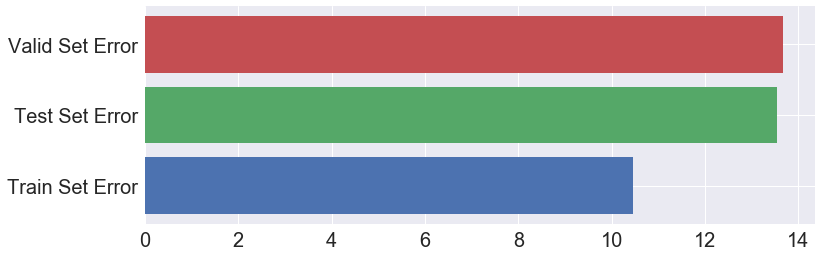

In [19]:
plt.figure(figsize=(12,4))
plt.barh('Train Set Error', acc_train[1])
plt.barh('Test Set Error', acc_test[1])
plt.barh('Valid Set Error', acc[1])

plt.show()

#### The model did not overfit as it performed well on the valid set, but generalized better on the test set which was kept hidden throught the training phase

In [31]:
# Extract single tree
estimator = final_model_r.estimators_[5]

NameError: name 'final_model_r' is not defined

In [21]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = train_X.columns,
                class_names = train_y,
                rounded = True, proportion = False, 
                precision = 2, filled = True)